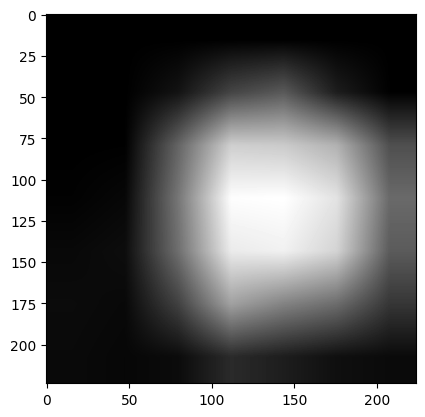

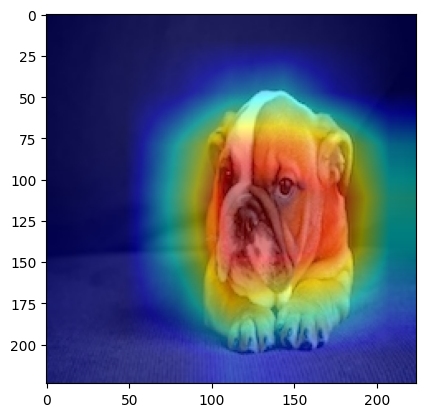

In [22]:
import torch
import numpy as np
from torchvision.models import resnet50
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# 加载预训练的 ResNet 模型
model = resnet50(pretrained=True)
model.eval()

# 准备输入图像
img = Image.open('./dog.jpg')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(img).unsqueeze(0)

# 使用 Grad-CAM
target_layer = model.layer4[-1]  # 指定目标卷积层
cam = GradCAM(model=model, target_layers=[target_layer])
grayscale_cam = cam(input_tensor=input_tensor)[0]

# 显示 grayscale_cam 的结果
plt.imshow(grayscale_cam, cmap='gray')
plt.show()

# 可视化 Grad-CAM 结果
rgb_img = np.array(img.resize((224, 224))) / 255
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
plt.imshow(visualization)
plt.show()